In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/Users/cesarchalco/Documents/projects/TF-unstructured-data-HO/exercise-02


/opt/anaconda3/envs/tf-ex02/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
from src.dataloader import *

In [4]:
img = mpimg.imread("data/train/1/image_06738_jpg.rf.5bb60eca609703a17d61543115df0958.jpg")

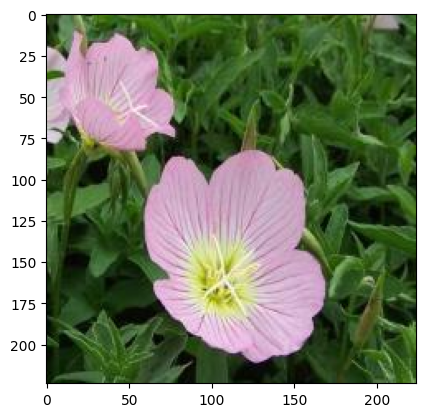

In [5]:
plt.imshow(img)
plt.axis('on')
plt.show()

In [6]:
from PIL import Image
import os
from collections import Counter

root_dir = 'data/train'

sizes = []

for class_dir in os.listdir(root_dir):
    class_path = os.path.join(root_dir, class_dir)
    if not os.path.isdir(class_path):
        continue
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                sizes.append(img.size)  # (width, height)
        except Exception as e:
            print(f"Failed to open {img_path}: {e}")

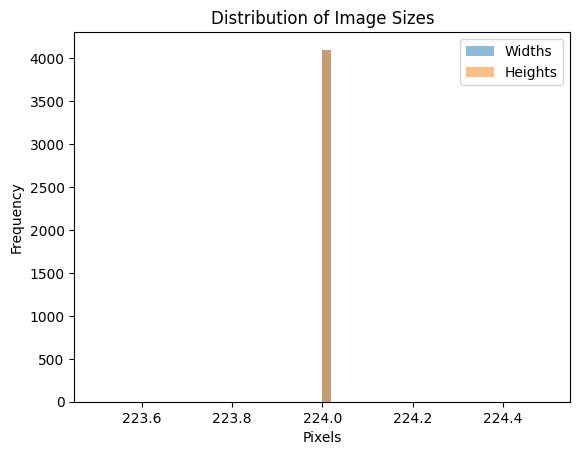

In [7]:
widths, heights = zip(*sizes)

plt.hist(widths, bins=50, alpha=0.5, label='Widths')
plt.hist(heights, bins=50, alpha=0.5, label='Heights')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.title('Distribution of Image Sizes')
plt.legend()
plt.show()

In [8]:
train, val, test = load_image_dataset(
    data_dir="data",
    batch_size=32,
    img_size=(224, 224)
)

Found 4102 files belonging to 102 classes.
Found 2045 files belonging to 102 classes.
Found 2042 files belonging to 102 classes.


In [9]:
preprocess_layers = get_preprocessing_pipeline()

In [10]:
train = train.map(lambda x, y: (preprocess_layers(x), y))
val = val.map(lambda x, y: (preprocess_layers(x), y))
test = test.map(lambda x, y: (preprocess_layers(x), y))

In [11]:
# next(iter(train))

In [12]:
from src.model import *

In [13]:
model = get_model()

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='artifacts/model_checkpoint.keras',
    monitor='val_loss',
    save_best_only=True
)


In [15]:
history = model.fit(
    train,
    validation_data=val,
    epochs=3,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/3
129/129 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - accuracy: 0.0386 - loss: 5.1164 - val_accuracy: 0.0949 - val_loss: 3.8779
Epoch 2/3
129/129 ━━━━━━━━━━━━━━━━━━━━ 40s 309ms/step - accuracy: 0.1224 - loss: 3.7021 - val_accuracy: 0.1731 - val_loss: 3.3628
Epoch 3/3
129/129 ━━━━━━━━━━━━━━━━━━━━ 40s 308ms/step - accuracy: 0.1968 - loss: 3.2323 - val_accuracy: 0.2469 - val_loss: 3.0490


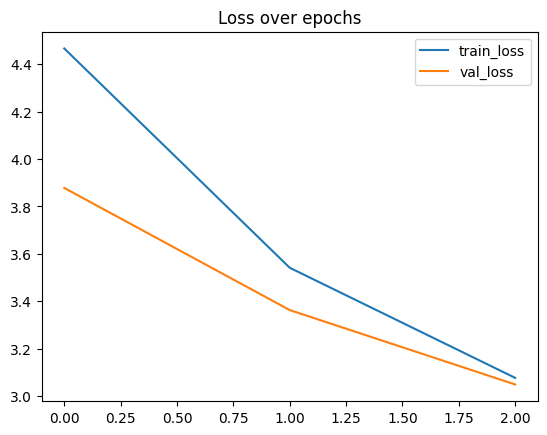

In [16]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

In [18]:
loss, accuracy = model.evaluate(test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.2411 - loss: 3.1335


In [20]:
print(f"Validation loss: {loss:.4f}")
print(f"Validation accuracy: {accuracy:.4f}")

Validation loss: 3.0576
Validation accuracy: 0.2473


In [21]:
history